Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load & Explore Data

In [1]:
# Load the dataset
df = pd.read_csv('House_Price.csv')

NameError: name 'pd' is not defined

In [ ]:
# Convert categorical columns to category data type
df['airport'] = df['airport'].astype('category')
df['waterbody'] = df['waterbody'].astype('category')
df['bus_ter'] = df['bus_ter'].astype('category')

In [ ]:
# View the first few rows of the dataset
print(df.head())

   price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
0   4.18   4.01      24.7       4.98     YES       5.480      11.1920   
1   5.12   5.06      22.2       9.14      NO       7.332      12.1728   
2   5.01   4.97      22.2       4.03      NO       7.394     101.1200   
3   6.16   5.96      21.3       2.94     YES       9.268      11.2672   
4   6.37   5.86      21.3       5.33      NO       8.824      11.2896   

  waterbody  rainfall bus_ter     parks  
0     River        23     YES  0.049347  
1      Lake        4

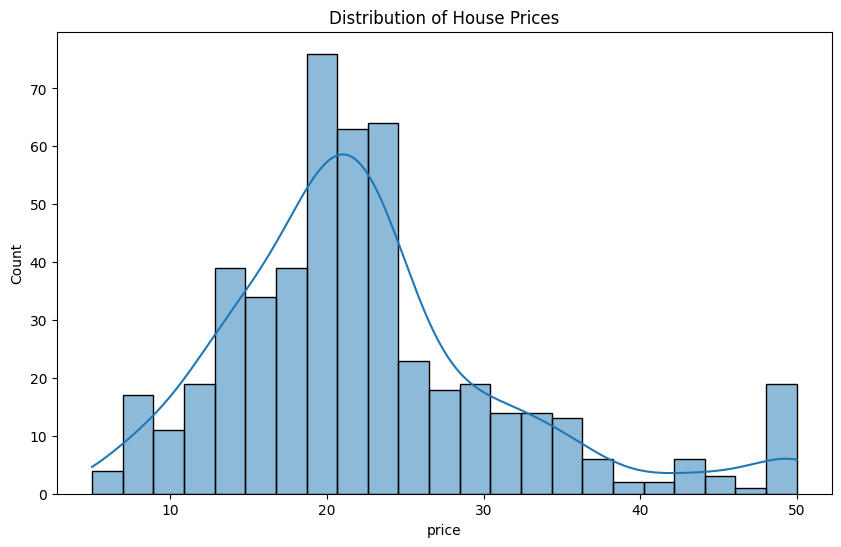

In [ ]:
# Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

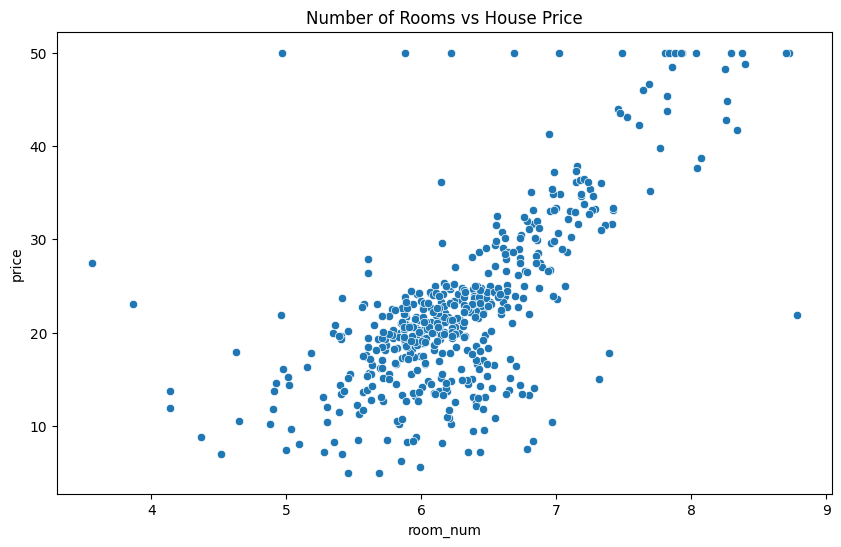

In [ ]:
# Scatter plot of room_num vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_num', y='price', data=df)
plt.title('Number of Rooms vs House Price')
plt.show()

Preprocess Data

In [ ]:
# Check for missing values
print(df.isnull().sum())

price            0
crime_rate       0
resid_area       0
air_qual         0
room_num         0
age              0
dist1            0
dist2            0
dist3            0
dist4            0
teachers         0
poor_prop        0
airport          0
n_hos_beds       8
n_hot_rooms      0
waterbody      155
rainfall         0
bus_ter          0
parks            0
dtype: int64


In [ ]:
null_percentage = df.isnull().sum() * 100 / len(df)
print(null_percentage)

price           0.000000
crime_rate      0.000000
resid_area      0.000000
air_qual        0.000000
room_num        0.000000
age             0.000000
dist1           0.000000
dist2           0.000000
dist3           0.000000
dist4           0.000000
teachers        0.000000
poor_prop       0.000000
airport         0.000000
n_hos_beds      1.581028
n_hot_rooms     0.000000
waterbody      30.632411
rainfall        0.000000
bus_ter         0.000000
parks           0.000000
dtype: float64


In [ ]:
threshold = 50  # Set your threshold
columns_to_drop = null_percentage[null_percentage > threshold].index
df = df.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")

Dropped columns: Index([], dtype='object')


In [ ]:
# Fill missing values with the mode for specific columns
if "n_hos_beds" in df.columns:
    df["n_hos_beds"] = df["n_hos_beds"].fillna(df["n_hos_beds"].mode()[0])
else:
    print("Column 'n_hos_beds' not found in DataFrame")

In [ ]:
if "waterbody" in df.columns:
    df["waterbody"] = df["waterbody"].fillna(df["waterbody"].mode()[0])
else:
    print("Column 'waterbody' not found in DataFrame")

In [ ]:
print(df.isnull().sum()) 


price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64


Convert Categorical Data

In [ ]:
# Convert categorical features into dummy variables
df = pd.get_dummies(df)

Split Data into Features and Target

In [ ]:
# Split the dataset into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

Train-Test Split

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Train and Evaluate Models

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Evaluate the Linear Regression model
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression R-squared: {r2}")
print(f"Linear Regression MSE: {mse}")

Linear Regression MAE: 3.3575434980895285
Linear Regression R-squared: 0.6476587212127399
Linear Regression MSE: 25.98314717505904


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R-squared: {rf_r2}")
print(f"Random Forest MSE: {rf_mse}")

Random Forest MAE: 2.043676470588235
Random Forest R-squared: 0.8770501082216905
Random Forest MSE: 9.066848892156855


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate the Gradient Boosting model
gb_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Gradient Boosting R-squared: {gb_r2}")
print(f"Gradient Boosting MSE: {gb_mse}")

Gradient Boosting MAE: 2.0011235999688894
Gradient Boosting R-squared: 0.8937256753460858
Gradient Boosting MSE: 7.837121520126869


Make Predictions

In [ ]:
# Function to predict house price
def predict_house_price(model, input_data):
    """
    Predicts the house price using the trained model.
    
    Parameters:
    model: The trained machine learning model.
    input_data: A dictionary containing the input features.
    
    Returns:
    Predicted house price.
    """
    # Convert the input dictionary to a DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Convert categorical columns to category data type
    input_df['airport'] = input_df['airport'].astype('category')
    input_df['waterbody'] = input_df['waterbody'].astype('category')
    input_df['bus_ter'] = input_df['bus_ter'].astype('category')
    
    # Ensure the input data has the same columns as the training data
    input_df = pd.get_dummies(input_df).reindex(columns=X.columns, fill_value=0)
    
    # Predict the house price
    predicted_price = model.predict(input_df)
    
    return predicted_price[0]

In [ ]:
# Example input data
input_data = {
    'crime_rate': 15,
    'resid_area': 2,
    'air_qual': 0.7,
    'room_num': 2,
    'age': 7,
    'dist1': 5,
    'dist2': 6,
    'dist3': 7,
    'dist4': 8,
    'teachers': 50,
    'poor_prop': 20,
    'airport': 1,
    'n_hos_beds': 10,
    'n_hot_rooms': 50,
    'waterbody': 0,
    'rainfall': 4,
    'bus_ter': 0,
    'parks': 0
}


# Predict the house price using the trained model
predicted_price = predict_house_price(model, input_data)
print(f"Predicted House Price: ${predicted_price:.2f}")

Predicted House Price: $14.80


In [ ]:
# Example input data
input_data = {
    'crime_rate': 15,
    'resid_area': 2,
    'air_qual': 0.7,
    'room_num': 2,
    'age': 7,
    'dist1': 5,
    'dist2': 6,
    'dist3': 7,
    'dist4': 8,
    'teachers': 50,
    'poor_prop': 20,
    'airport': 1,
    'n_hos_beds': 10,
    'n_hot_rooms': 50,
    'waterbody': 0,
    'rainfall': 4,
    'bus_ter': 0,
    'parks': 0
}


# Predict the house price using the trained model
predicted_price = predict_house_price(rf_model, input_data)
print(f"Predicted House Price: ${predicted_price:.2f}")

Predicted House Price: $15.02


In [ ]:
# Example input data
input_data = {
    'crime_rate': 15,
    'resid_area': 2,
    'air_qual': 0.7,
    'room_num': 2,
    'age': 7,
    'dist1': 5,
    'dist2': 6,
    'dist3': 7,
    'dist4': 8,
    'teachers': 50,
    'poor_prop': 20,
    'airport': 1,
    'n_hos_beds': 10,
    'n_hot_rooms': 50,
    'waterbody': 0,
    'rainfall': 4,
    'bus_ter': 0,
    'parks': 0
}


# Predict the house price using the trained model
predicted_price = predict_house_price(gb_model, input_data)
print(f"Predicted House Price: ${predicted_price:.2f}")

Predicted House Price: $19.68


Visualize Predictions

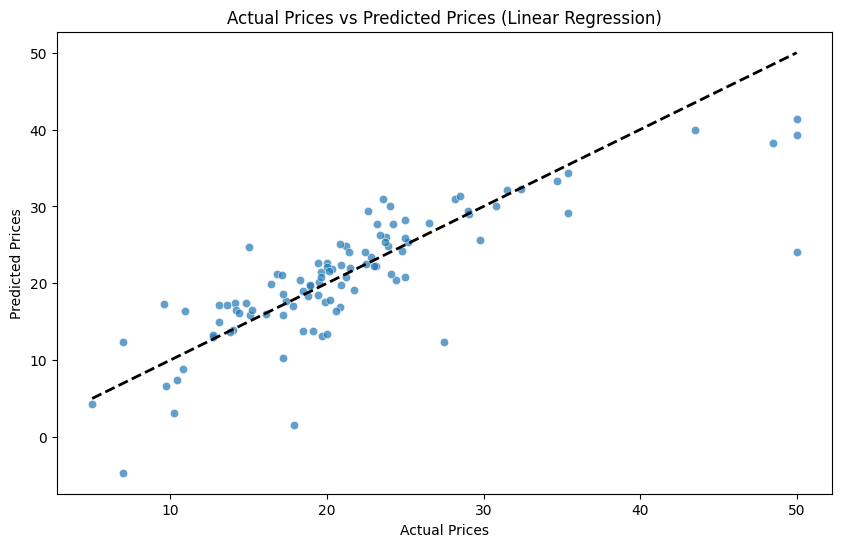

In [ ]:
# Scatter Plot for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (Linear Regression)')
plt.show()

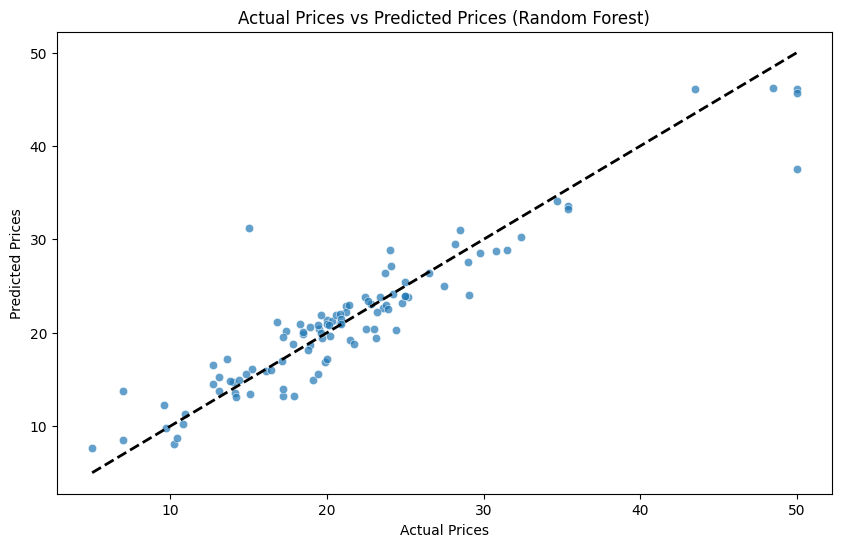

In [ ]:
# Scatter Plot for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (Random Forest)')
plt.show()

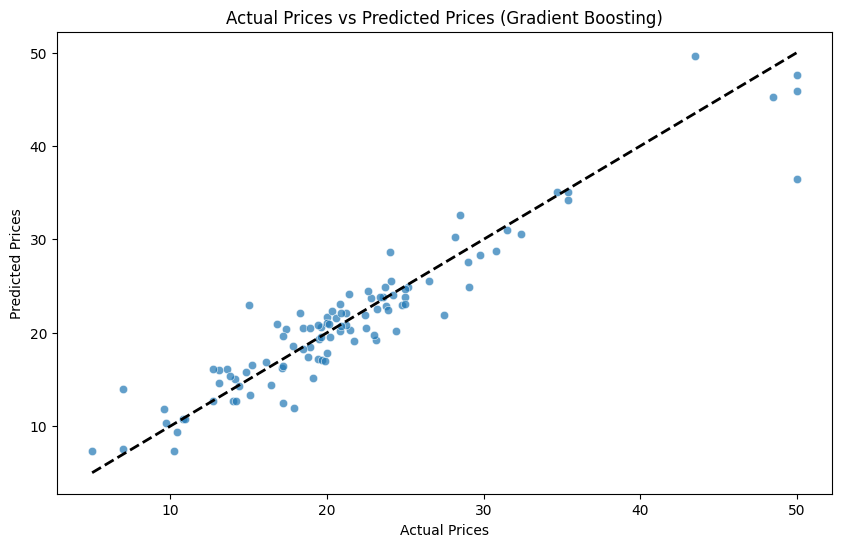

In [ ]:
# Scatter Plot for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (Gradient Boosting)')
plt.show()

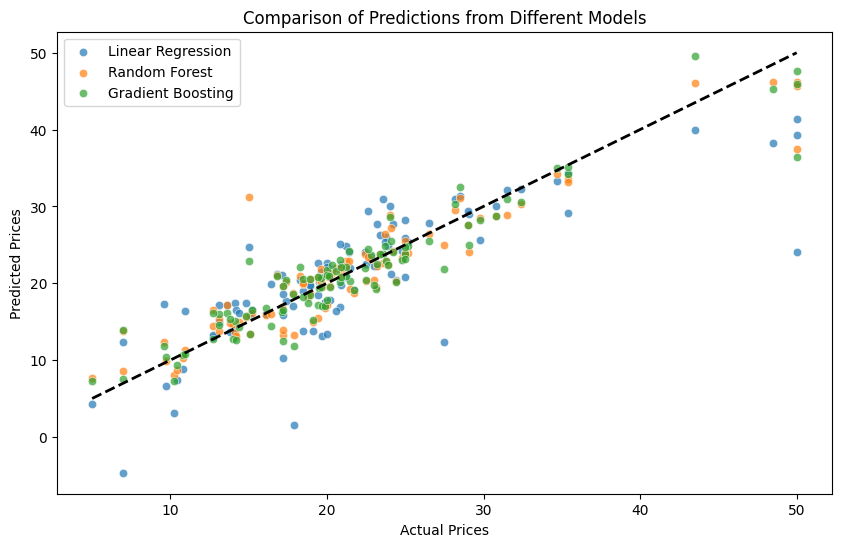

In [ ]:
# Create a DataFrame to compare predictions
comparison_df = pd.DataFrame({
    'Actual Prices': y_test,
    'Linear Regression': y_pred_lr,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred
})

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Prices', y='Linear Regression', data=comparison_df, label='Linear Regression', alpha=0.7)
sns.scatterplot(x='Actual Prices', y='Random Forest', data=comparison_df, label='Random Forest', alpha=0.7)
sns.scatterplot(x='Actual Prices', y='Gradient Boosting', data=comparison_df, label='Gradient Boosting', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Predictions from Different Models')
plt.legend()
plt.show()

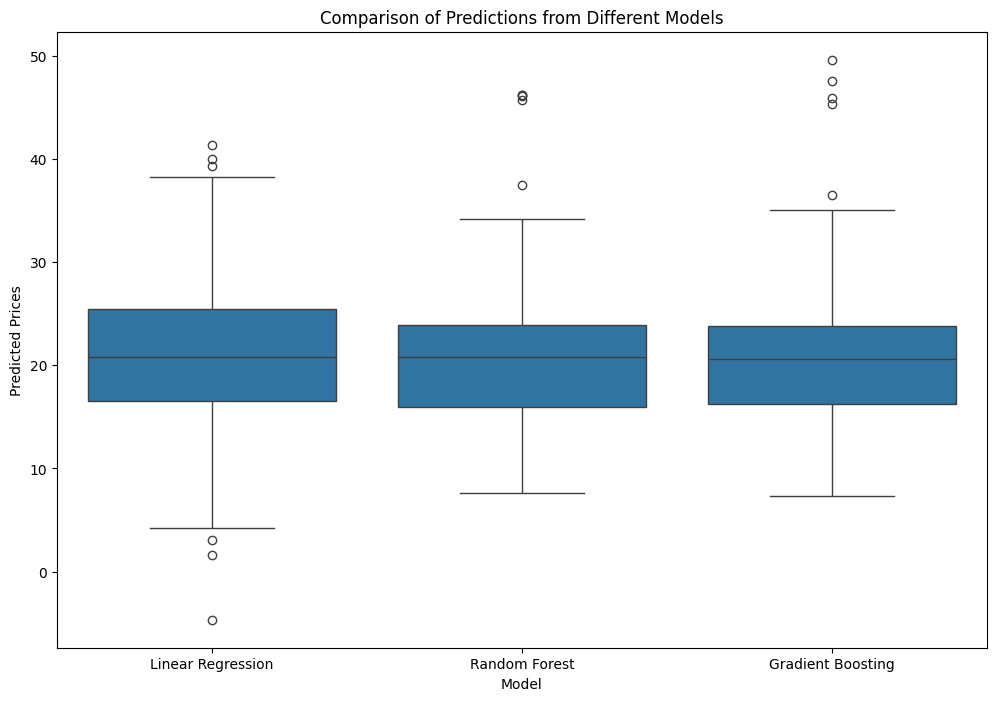

In [ ]:
# Melt the DataFrame for box plot
melted_df = comparison_df.melt(id_vars=['Actual Prices'], var_name='Model', value_name='Predicted Prices')

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Predicted Prices', data=melted_df)
plt.title('Comparison of Predictions from Different Models')
plt.show()

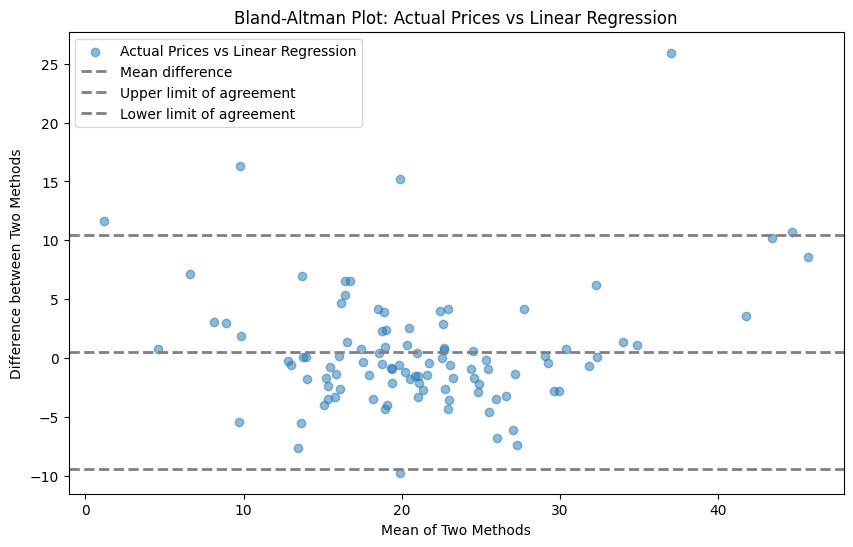

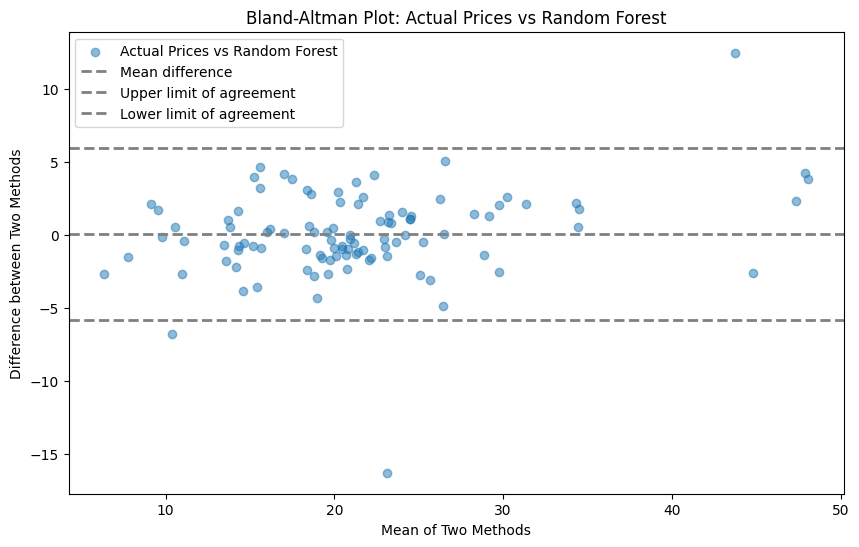

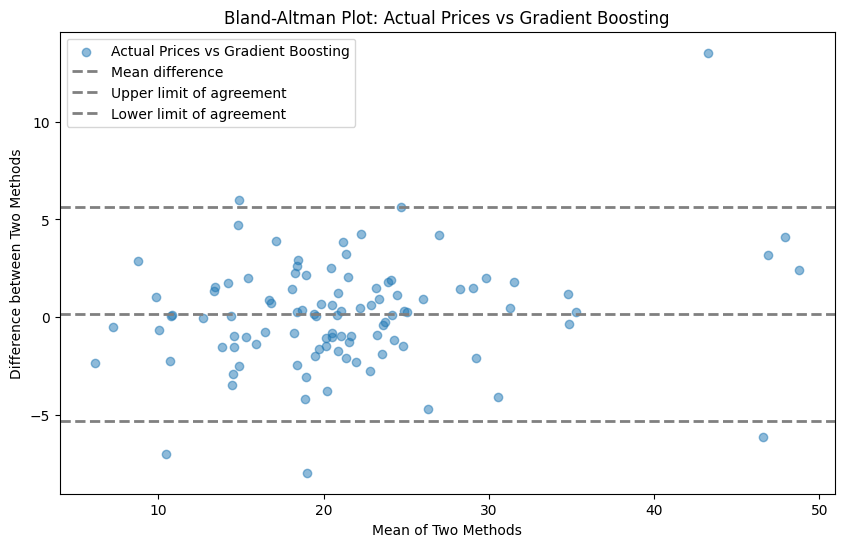

In [ ]:
def bland_altman_plot(data1, data2, label1, label2):
    """
    Create a Bland-Altman plot to compare two sets of data.
    
    Parameters:
    data1: First set of data (e.g., actual prices).
    data2: Second set of data (e.g., predicted prices).
    label1: Label for the first set of data.
    label2: Label for the second set of data.
    """
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2
    md = np.mean(diff)
    sd = np.std(diff, axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(mean, diff, alpha=0.5, label=f'{label1} vs {label2}')
    plt.axhline(md, color='gray', linestyle='--', lw=2, label='Mean difference')
    plt.axhline(md + 1.96 * sd, color='gray', linestyle='--', lw=2, label='Upper limit of agreement')
    plt.axhline(md - 1.96 * sd, color='gray', linestyle='--', lw=2, label='Lower limit of agreement')
    plt.xlabel('Mean of Two Methods')
    plt.ylabel('Difference between Two Methods')
    plt.title(f'Bland-Altman Plot: {label1} vs {label2}')
    plt.legend()
    plt.show()

# Create Bland-Altman plots for each model comparison
bland_altman_plot(y_test.values, y_pred_lr, 'Actual Prices', 'Linear Regression')
bland_altman_plot(y_test.values, rf_pred, 'Actual Prices', 'Random Forest')
bland_altman_plot(y_test.values, gb_pred, 'Actual Prices', 'Gradient Boosting')